<a href="https://colab.research.google.com/github/MagnumOpusSirius/Regression-Model/blob/master/Timeseries_handson_11_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Good morning everyone! 😊

Hope you're all doing well!

🔹 Today’s agenda: Time Series Hands-on with Air Passengers Data 📊

🔹 It’s going to be an interesting and practical session

🔹 Please keep a notebook ready 📝

🔹 Stay interactive throughout

🔹 Don’t hesitate to ask your doubts — I’m here to help 🙌

Let’s get started! 🚀

In [ ]:
#8:05

In [ ]:
# b--d---> per day --> flight ---> 5k
# airlines


#🛫 Problem Statement –  Airline! ✈️

Imagine you're managing flight operations for a major airline — say, from Bangalore to Delhi, or routes like Hyderabad to Mumbai or Chennai to Kolkata.

Now think about this:

✈️ If too many flights are scheduled but fewer passengers turn up, many seats go empty — leading to huge losses.

👥 On the other hand, if too few flights are scheduled and more passengers show up, it leads to overbooking, delays, and unhappy customers — and the airline loses profit.

So how can airlines plan better?
The key is to forecast how many passengers are likely to travel on any given day.

That’s exactly what we’re doing today with Time Series Forecasting using the Air Passengers dataset.

We’ll explore:

How the number of passengers changes over time

What patterns or trends exist

And how to predict future passenger demand to help airlines plan flights efficiently

This is a real-world use case of data science — and you’re going to solve it today! 🚀



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('dark_background')

In [ ]:
data = pd.read_csv("/content/AirPassengers.csv")
#https://drive.google.com/file/d/1DHogc2Of_wcx3d1o3jmOTyIt6q46_L14/view?usp=sharing

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


#
we have data startimg from 1949 jan - 1960 dec

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#As month col is in obj data type we need to change it into date time format

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
#null values
#duplicate values

In [ ]:
data.isnull().sum()

,0
Month,0
#Passengers,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.set_index("Month",inplace = True)

In [ ]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

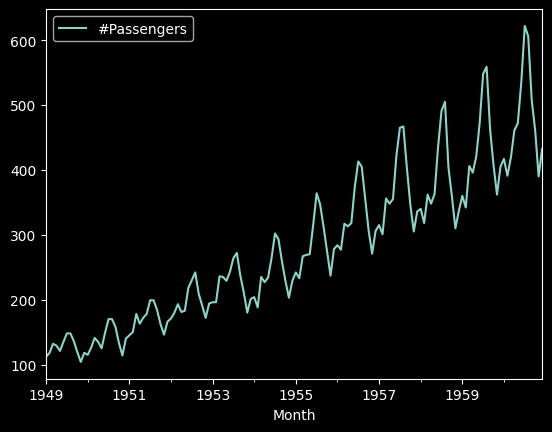

In [ ]:
data.plot()

#This graph has both trendand sesonality

In [ ]:
#seasonal_decompose --- take your time series data as input and decompose it into three main components

# Trend - The overall direction or pattern in the data over a long period of time
# sesonality- The repeating short term cycle in the data ("monthly/quarterly")
# Residual- Noise ---- residual is like a sudden unpredictable change which do not has any correlation

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)


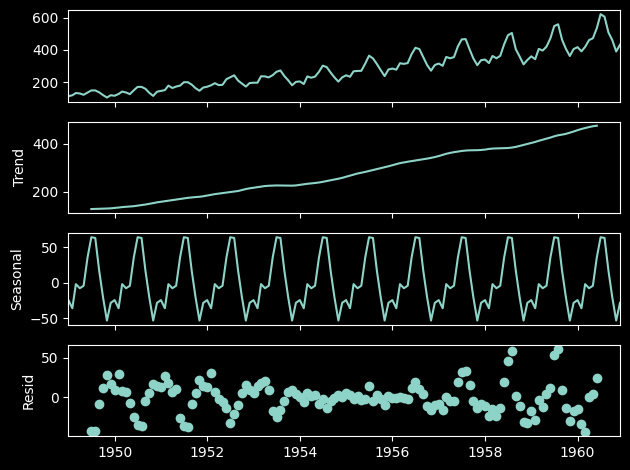

In [ ]:
decomposed = seasonal_decompose(data)
print(decomposed.plot())

In [ ]:
#check whether the dat ais stationarity or not??
#adfuller - Augumented dickey fuller test -- TO CHECK WHETHER THE DATA IS STATIONARY OR NOT

#null hypo - data is not stationary
#alt hypo - data is stationary


#if p-val less than < 0.05 ---data is stationary -- acc to null
#ifp-val> 0.05 ---  --- data is not sttaionary -- acc the alter

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(data)

In [ ]:
pval = test_result[1]
pval

np.float64(0.991880243437641)

In [ ]:
test_result[1]

np.float64(0.991880243437641)

In [ ]:
if pval < 0.05:
  print("Reject the null hypo  --- data is stationary")
else:
  print(" --- data is not staionary")

 --- data is not staionary


In [ ]:
#stationary  -- the data ehich has constant mean and varinace over time
#As our data is not staionary we need to convert ito stationary
#to convert the data into stationary - we need to stabilize the mean and variance over time
#Remove sesonality
#remove trend

<Axes: xlabel='Month'>

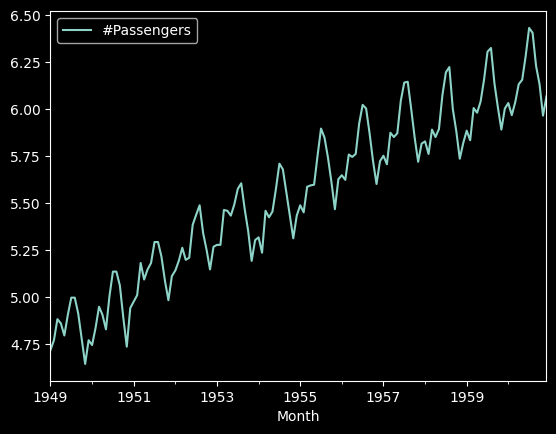

In [ ]:
#logrithmic transformation
first_log = np.log(data)
first_log = first_log.dropna()
first_log.plot()

In [ ]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
#Rolling Mean(mean_log) - This computes the moving average of the timeseries over aspecified window ( in oue case time period is 12)
#it helpssmooth out short term fluctuations and highlight long term trends

#rooling std(std_log)--moving std- shows how much variation exists around the rolling mean

Text(0.5, 1.0, 'RM &RS')

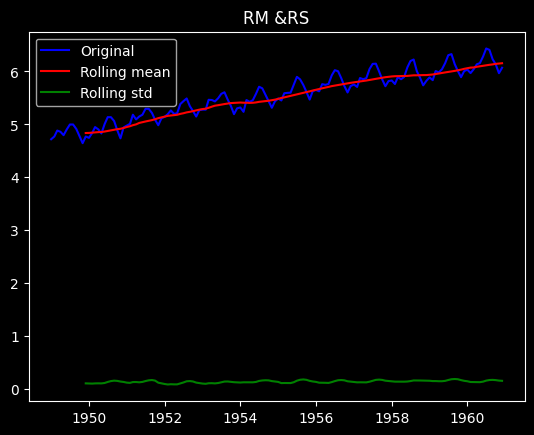

In [ ]:
mean_log = first_log.rolling(window =12).mean()
std_log = first_log.rolling(window =12).std()

plt.plot(first_log, color = 'blue',label = 'Original')
plt.plot(mean_log, color = 'red',label = 'Rolling mean')
plt.plot(std_log, color = 'green',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title("RM &RS")

In [ ]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head(20)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


Text(0.5, 1.0, 'RM &RS')

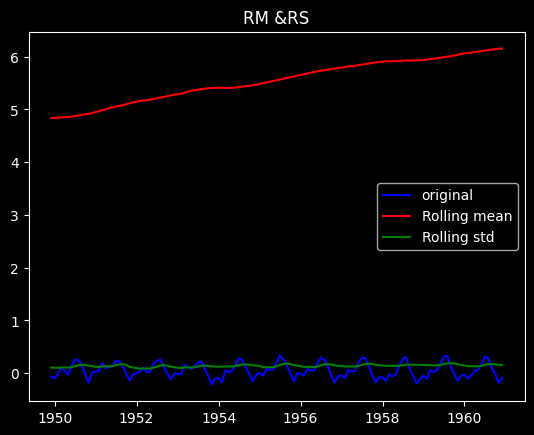

In [ ]:
plt.plot(new_data,color = 'blue' ,label = 'original')
plt.plot(mean_log, color = 'red',label = 'Rolling mean')
plt.plot(std_log, color = 'green',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title("RM &RS")

<Axes: xlabel='Month'>

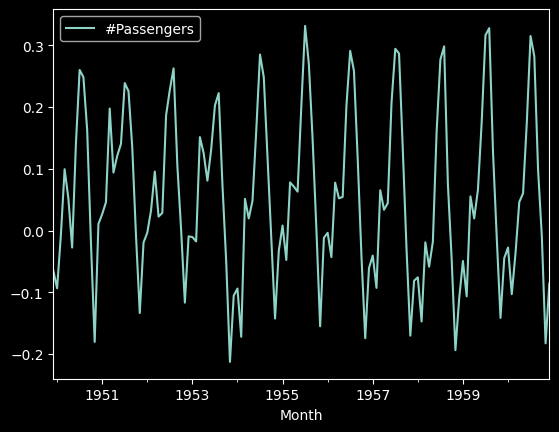

In [ ]:
new_data.plot()

In [ ]:
#Again chceking whether the data is stationary or not
test_result = adfuller(new_data)
pval = test_result[1]
pval


np.float64(0.022234630001242206)

In [ ]:
if pval < 0.05:
  print("Reject the null hypo  --- data is stationary")
else:
  print(" --- data is not staionary")

Reject the null hypo  --- data is stationary


In [ ]:
#MODEL BUILDING PART

new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
train = new_data.iloc[:120]["#Passengers"] #till 120 in training
test= new_data.iloc[120:]["#Passengers"]#remaining 13 in testing

In [ ]:
train

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


In [ ]:
test

,#Passengers
Month,
1959-12-01,-0.044481
1960-01-01,-0.027530
1960-02-01,-0.103067
1960-03-01,-0.036530
1960-04-01,0.046332
1960-05-01,0.060186
1960-06-01,0.175033
1960-07-01,0.315151
1960-08-01,0.282363


In [ ]:
test.shape

(13,)

In [ ]:
#IMPLEMENTATION OF ARIMA
#AUTOREGRESSIVE INTEGRATED MOVING AVERAGE-- #AR+MA
# -p,d,q
# p- order of lag
# d - degree of differencing
# q- #order of moving average

# p- How many past values you ahve to consider for prediction
# d -how many times you need to subtract the past values to make the data in steady
# q- how many past errors you want to use tonimprove your predictions

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import *

In [ ]:
import itertools
p= range(0,7)
d = range(1,2)
q = range(0,7)
pdq = list(itertools.product(p,d,q))
rmse = []
order1 = []
for i in pdq:
  model = ARIMA(train,order = i)
  model_fit = model.fit()
  pred= model_fit.predict(start = len(train), end = len(train)+len(test)-1 )  #start = 120 #ending =120 +13 = 133 -1 = 132
  error = np.sqrt(mean_squared_error(test,pred))
  order1.append(i)
  rmse.append(error)

results = pd.DataFrame(index = order1,data = rmse,columns =['RMSE'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
results.sort_values(by = 'RMSE',ascending = True)

,RMSE
"(6, 1, 6)",0.066423
"(4, 1, 6)",0.073258
"(5, 1, 6)",0.076548
"(6, 1, 1)",0.099005
"(4, 1, 5)",0.109957
"(4, 1, 3)",0.114378
"(3, 1, 3)",0.114606
"(6, 1, 5)",0.115909
"(6, 1, 3)",0.127697
"(6, 1, 2)",0.127791


In [ ]:
A_model = ARIMA(train,order = (6,1,6))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
A_model = A_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
new_data["Arima_prediction"] = A_model.predict(start = len(train), end = len(train)+len(test)-1 )

In [ ]:
new_